In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#load data
df = pd.read_csv('train.csv', 
                 header=0, low_memory=False, 
                 infer_datetime_format=True, 
                 parse_dates={'datetime':[0]})

In [3]:
#datetime as index
df_line = df.set_index('datetime')

In [4]:
#every category = 1, for Counting
df_line['Category'] = 1

In [5]:
df_sum = df_line['Category']

In [6]:
#Resample dates for plotting - monthly
daily_groups = df_sum.resample('M')
df_monthly = daily_groups.sum()
df_monthly = df_monthly.to_frame()
#df_monthly = df_monthly.rename(index=str, columns={"Category": "Verbrechen pro Monat"})

In [7]:
#Resample dates for plotting - daily
daily_groups_day = df_sum.resample('D')
df_day = daily_groups_day.sum()
df_day = df_day.to_frame()
df_line = df_line.rename(index=str, columns={"Category": "Verbrechen pro Monat"})

C:\Users\mker\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


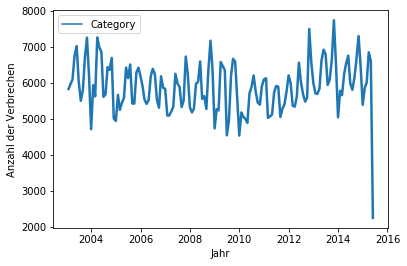

In [8]:
#plot and save it
plt.figsize=(21, 21)
ax = sns.lineplot(data=df_monthly, palette="tab10", linewidth=2.5)
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Verbrechen')
plt.savefig('CrimePerMonth.png')
plt.show()

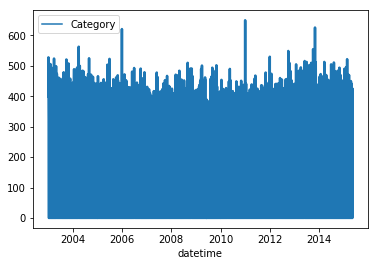

<Figure size 432x288 with 0 Axes>

In [9]:
#plot and save it
plt.figsize=(21, 21)
sns.lineplot(data=df_day, palette="tab10", linewidth=2.5)
plt.show()
plt.savefig('CrimePerDay.png')

Preparation for other Plots

In [10]:
# reset index fpr scatterplot
df_monthly_index = df_monthly.reset_index()

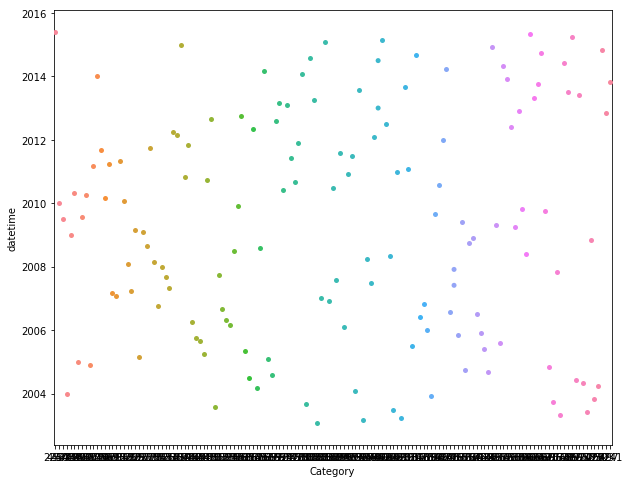

In [11]:
# reset index fpr scatterplot
plt.figure(figsize=(10,8))
sns.swarmplot(x="Category", y="datetime",data=df_monthly_index)
plt.show()